Madison
 - Collaborator 1
 - Collaborator 2
 - etc

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 2 - Classification

Due Friday Mar 28, 2025 4p

Total pts: 30

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - *Do not rewrite code* if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

In this problem, you'll be comparing Logistic Regression, Decision Trees, and Random Forests in a task identifying mushrooms as edible or poisonous.
The data is imported below and the features and feature values are listed. Notice, they're all letters.

 - Split the data into targets and features
 - Decide which features are ordinal or categorical. Refer to the feature descriptions on the [UCI Machine Learning site](https://archive.ics.uci.edu/dataset/73/mushroom) (hint: at least 3 categories are ordinal and others are binary...so you'll use an ordinal encoder)
 - Encode the features
 - Train the three models. You will want to use ```LogisticRegressionCV``` and ```GridSearchCV``` to find the best version of each model.
 - Make predictions with your models.
 - Show the confusion matrices for each type of model evaluated on the same test set. Label each figure clearly as to which model it is.

In [75]:
import pandas as pd
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

mushrooms_df = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/mushrooms.csv')

print(mushrooms_df.columns)

for k, col in enumerate(mushrooms_df.columns):
    print(f'{k:>3}. {col} - {mushrooms_df[col].unique()}')

Index(['type', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 'odor',
       'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat'],
      dtype='object')
  0. type - ['p' 'e']
  1. cap_shape - ['x' 'b' 's' 'f' 'k' 'c']
  2. cap_surface - ['s' 'y' 'f' 'g']
  3. cap_color - ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
  4. bruises - ['t' 'f']
  5. odor - ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
  6. gill_attachment - ['f' 'a']
  7. gill_spacing - ['c' 'w']
  8. gill_size - ['n' 'b']
  9. gill_color - ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
 10. stalk_shape - ['e' 't']
 11. stalk_root - ['e' 'c' 'b' 'r' '?']
 12. stalk_surface_above_ring - ['s' 'f' 'k' 'y']
 13. stalk_surface_below_ring - ['s' 'f' 'y' 'k']
 14.

In [76]:
X = mushrooms_df.drop(columns='type')
y = mushrooms_df['type']

In [82]:
all_features = list(X.columns)

ordinal_features = ['bruises', 
                    'gill_attachment', 
                    'gill_size', 
                    'gill_spacing',
                    'stalk_shape',
                    'ring_number',
                    'population']

bruises_categories = ['f', 't']
gill_attachment_categories = ['f', 'a']
gill_size_categories = ['n', 'b']
gill_spacing_categories = ['c', 'w']
stalk_shape_categories = ['e', 't']
ring_number_categories = ['o', 't', 'n']
population_categories = ['s', 'n', 'a', 'v', 'y', 'c']

ordEnc_bruises = OrdinalEncoder(categories=[bruises_categories])
ordEnc_gill_attachment = OrdinalEncoder(categories=[gill_attachment_categories])
ordEnc_gill_size = OrdinalEncoder(categories=[gill_size_categories])
ordEnc_gill_spacing = OrdinalEncoder(categories=[gill_spacing_categories])
ordEnc_stalk_shape = OrdinalEncoder(categories=[stalk_shape_categories])
ordEnc_ring_number = OrdinalEncoder(categories=[ring_number_categories])
ordEnc_population = OrdinalEncoder(categories=[population_categories])

categorical_features = [col for col in all_features if col not in ordinal_features]

In [85]:
oneHotEnc = OneHotEncoder()

coltrans = ColumnTransformer(
    transformers=[
        ("ord_bruises", ordEnc_bruises, ['bruises']),
        ("ord_gill_attachment", ordEnc_gill_attachment, ['gill_attachment']),
        ("ord_gill_size", ordEnc_gill_size, ['gill_size']),
        ("ord_gill_spacing", ordEnc_gill_spacing, ['gill_spacing']),
        ("ord_stalk_shape", ordEnc_stalk_shape, ['stalk_shape']),
        ("ord_ring_number", ordEnc_ring_number, ['ring_number']),
        ("ord_population", ordEnc_population, ['population']),
        ("onehot", oneHotEnc, categorical_features)
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_trans = coltrans.fit_transform(X_train)
X_test_trans = coltrans.transform(X_test)


In [87]:
log_reg_pipeline = Pipeline([
    ('preprocessor', coltrans),
    ('classifier', LogisticRegressionCV(cv=5, max_iter=10000))
])

tree_pipeline = Pipeline([
    ('preprocessor', coltrans),
    ('classifier', DecisionTreeClassifier())
])

forest_pipeline = Pipeline([
    ('preprocessor', coltrans),
    ('classifier', RandomForestClassifier())
])

tree_param_grid = {
    'classifier__max_depth': [3, 5, 7, 10, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

forest_param_grid = {
    'classifier__n_estimators': [10, 50, 100, 200],
    'classifier__max_depth': [3, 5, 10, None],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

tree_search = GridSearchCV(tree_pipeline, tree_param_grid, cv=5, n_jobs=-1, verbose=1)
forest_search = GridSearchCV(forest_pipeline, forest_param_grid, cv=5, n_jobs=-1, verbose=1)

log_reg_pipeline.fit(X_train, y_train) 
tree_search.fit(X_train, y_train)  
forest_search.fit(X_train, y_train)  


Fitting 5 folds for each of 45 candidates, totalling 225 fits
Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ord_bruises',
                                                                         OrdinalEncoder(categories=[['f',
                                                                                                     't']]),
                                                                         ['bruises']),
                                                                        ('ord_gill_attachment',
                                                                         OrdinalEncoder(categories=[['f',
                                                                                                     'a']]),
                                                                         ['gill_attachment']),
                                                                        ('ord_gill_size',
                                                                         OrdinalEncoder(categories=[['n',
                                                                                                     'b']]),
                                                                         ['gill_size']),
                                                                        ('ord_gill_sp...
                                                                          'stalk_color_below_ring',
                                                                          'veil_type',
                                                                          'veil_color',
                                                                          'ring_type',
                                                                          'spore_print_color',
                                                                          'habitat'])],
                                                          verbose_feature_names_out=False)),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [3, 5, 10, None],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [10, 50, 100, 200]},
             verbose=1)

In [88]:
y_pred_log_reg = log_reg_pipeline.predict(X_test)
y_pred_tree = tree_search.predict(X_test)
y_pred_forest = forest_search.predict(X_test)

print(f"Predictions for Logistic Regression: {y_pred_log_reg[:10]}") 
print(f"Predictions for Decision Tree: {y_pred_tree[:10]}")
print(f"Predictions for Random Forest: {y_pred_forest[:10]}")

cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
cm_tree = confusion_matrix(y_test, y_pred_tree)
cm_forest = confusion_matrix(y_test, y_pred_forest)

print("Confusion Matrix for Logistic Regression:")
print(cm_log_reg)
print("Confusion Matrix for Decision Tree:")
print(cm_tree)
print("Confusion Matrix for Random Forest:")
print(cm_forest)

Predictions for Logistic Regression: ['e' 'p' 'p' 'e' 'p' 'p' 'p' 'p' 'e' 'e']
Predictions for Decision Tree: ['e' 'p' 'p' 'e' 'p' 'p' 'p' 'p' 'e' 'e']
Predictions for Random Forest: ['e' 'p' 'p' 'e' 'p' 'p' 'p' 'p' 'e' 'e']
Confusion Matrix for Logistic Regression:
[[843   0]
 [  0 782]]
Confusion Matrix for Decision Tree:
[[843   0]
 [  0 782]]
Confusion Matrix for Random Forest:
[[843   0]
 [  0 782]]


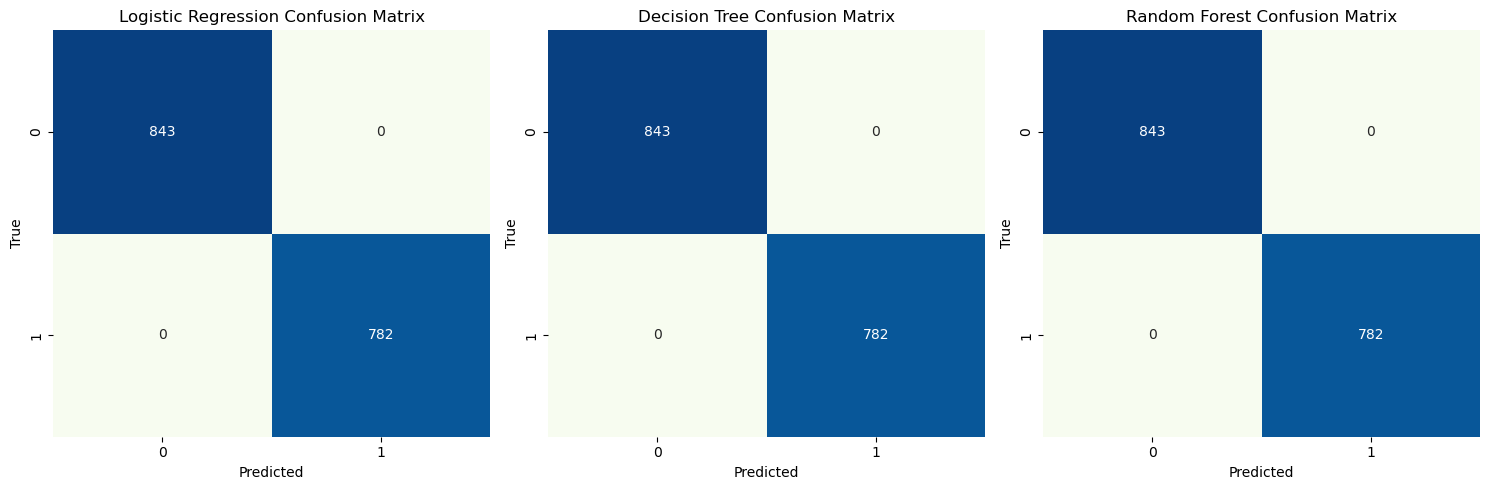

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Logistic Regression Confusion Matrix
sns.heatmap(cm_log_reg, annot=True, fmt='d', cmap='GnBu', ax=axes[0], cbar=False)
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('True')

# Decision Tree Confusion Matrix
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='GnBu', ax=axes[1], cbar=False)
axes[1].set_title('Decision Tree Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('True')

# Random Forest Confusion Matrix
sns.heatmap(cm_forest, annot=True, fmt='d', cmap='GnBu', ax=axes[2], cbar=False)
axes[2].set_title('Random Forest Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('True')

plt.tight_layout()
plt.show()

### Problem 1 questions

 - Which model was best?
 - What were the hyper-parameters of this model.
 - What were the accuracy, recall, and precision of the model.
 - Of accuracy, recall, precision, which did you use to decide the best model.

#### Your responses here:

- Which model: 
- Hyper-parameters:
- Metrics
    - Accuracy:
    - Recall:
    - Precision:
- How did you decide best? 

## Problem 2

The NFL draft is coming up at the end of April. This is when NFL teams get to select college players to join their team. The draft comprises seven rounds over three days (day 1: round 1, day 2: rounds 2 and 3, day 3: rounds 4, 5, 6, 7) with teams taking turns selecting players. Better players tend to go in earlier rounds.

In this problem, you will try to predict whether defensive players are drafted on Day 1, 2, or 3 based on their performance in the NFL combine (an assay of physical skills).

The data are imported below.

 - Create a target variable for day 1, day 2, day 3 based on the round drafted.
 - Create the most accurate predictor you can using any method or subset of the data you choose. *You may not use round as a feature!*
 - Show the confusion matrix for your model and list the accuracy of your model.

In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer  # Add this import for SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

nfl_draft = pd.read_csv('https://raw.githubusercontent.com/eatai/datasets/refs/heads/main/nfl_defensive_draft.csv')
print(nfl_draft.head())

   Unnamed: 0  round  season                name   age position  \
0           0      1    2003   Dewayne Robertson  21.0       DL   
1           1      1    2003      Terence Newman  25.0       DB   
2           2      1    2003  Johnathan Sullivan  22.0       DL   
3           3      1    2003      Kevin Williams  23.0       DL   
4           4      1    2003       Terrell Suggs  20.0       LB   

       college_conference    height  weight  forty  vertical  broad_jump  \
0                     NaN  6.083333   317.0   5.15       NaN         NaN   
1   Big Twelve Conference  5.833333   189.0   4.37      41.0       136.0   
2                     NaN  6.250000   313.0   5.10       NaN         NaN   
3                     NaN  6.416667   304.0   4.81      30.0       112.0   
4  Pacific Ten Conference  6.250000   262.0   4.84       NaN         NaN   

   cone  shuttle  
0   NaN      NaN  
1  6.88     3.83  
2   NaN      NaN  
3  7.66     5.04  
4   NaN      NaN  


In [90]:
def map_round_to_day(round_num):
    if round_num == 1:
        return 'Day 1'
    elif round_num in [2, 3]:
        return 'Day 2'
    else:
        return 'Day 3'

nfl_draft['draft_day'] = nfl_draft['round'].apply(map_round_to_day)

In [91]:
X = nfl_draft.drop(columns=['round', 'draft_day'])
y = nfl_draft['draft_day']

In [94]:
numeric_features = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), 
    ('scaler', StandardScaler())  
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),  
        ('cat', categorical_transformer, categorical_features)  # Process categorical features
    ])

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])


In [96]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


In [97]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.5683


Confusion Matrix:
[[  6  21  43]
 [  5  44 108]
 [  0  22 212]]


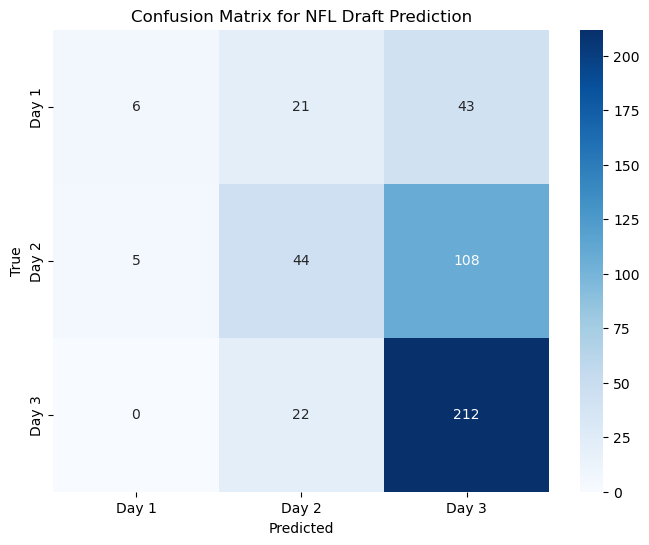

In [98]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Day 1', 'Day 2', 'Day 3'], yticklabels=['Day 1', 'Day 2', 'Day 3'])
plt.title("Confusion Matrix for NFL Draft Prediction")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

### Problem 2 Questions

 - Which kind of model did you use and why did you choose it? I chose random forest because of the ability to combine multiple trees. This method reduces overfitting that might occur if only one tree was used compared to averaging multiple trees. Also, with random forest there is no assumption of a linear relationship between features and target, which is applicable to a dataset such as player performance and draft day.
 - What was your accuracy? 0.5683